In [1]:
import os
import torch
import timeit
import random
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn import decomposition
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
path = '/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/Berlin/wav'
os.chdir(path)

durs = []
lens = []

for file in os.listdir('.'):
    dur = librosa.get_duration(filename=file)
    audioinput, sr = librosa.load(file, sr=16000)
    durs.append(dur)
    lens.append(len(audioinput))

print(max(durs), max(lens))

print(np.mean(np.array(durs)) + np.std(np.array(durs))) # ave duration + std deviation
print(np.mean(np.array(lens)) + np.std(np.array(lens))) # ave duration + std deviation

8.97825 143652
3.806839123563467
60909.42597701548


In [25]:
path = '/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/Berlin/wav'
os.chdir(path)

hct_A = np.array([])
hct_E = np.array([])
hct_F = np.array([])
hct_L = np.array([])
hct_N = np.array([])
hct_T = np.array([])
hct_W = np.array([])

for file in os.listdir('.'):
    audioinput, sr = librosa.load(file, sr=16000)
    audioinput = librosa.util.fix_length(audioinput, size=143652, mode="edge") #pad to same length
    
#     utterance features
#     utter = []
#     kur = kurtosis(audioinput)
#     ske = skew(audioinput)
#     ma = np.amax(np.array(audioinput), axis=0)
#     mi = np.amin(np.array(audioinput), axis=0)
#     ave = np.mean(np.array(audioinput), axis=0)
#     var = np.var(np.array(audioinput), axis=0)
    
#     for i in (kur, ske, ma, mi, ave, var):
#         utter.append(i)
    
#     spectral features
#     mfcc = librosa.feature.mfcc(y=audioinput, sr=sr, n_fft=800, hop_length=400, n_mfcc=40)
#     mfcc_frame = np.mean(mfcc.T, axis=0) #frame level
#     mfcc_phoneme = []
#     for i in range(0,len(mfcc_frame)-3,2):
#         mfcc_phoneme.append((mfcc_frame[i]+mfcc_frame[i+1]+mfcc_frame[i+2])/3) #phoneme level
#     mfcc_word=[]
#     for i in range(0, len(mfcc_phoneme)-5,4):
#         mfcc_word.append((mfcc_phoneme[i]+mfcc_phoneme[i+1]+mfcc_phoneme[i+4])/5) #word level
#     mfcc_utter=[]
#     mfcc_utter = np.mean(mfcc_word) #utterance level

#     for i in (kur, ske, ma, mi, ave, var):
#         mfcc_utter = np.append(mfcc_utter, i)

#     mel = librosa.feature.melspectrogram(y=audioinput, sr=sr, n_fft=800, hop_length=400)
#     mel_del = librosa.feature.delta(mel, order=1)
#     mel_del2 = librosa.feature.delta(mel, order=2)
#     mels = np.vstack((mel, mel_del, mel_del2))
#     mels_frame = np.mean(mels.T, axis=0)
#     mels_phoneme = []
#     for i in range(0,len(mels_frame)-3,2):
#         mels_phoneme.append((mels_frame[i]+mels_frame[i+1]+mels_frame[i+2])/3) #phoneme level
#     mels_word=[]
#     for i in range(0, len(mels_phoneme)-5,4):
#         mels_word.append((mels_phoneme[i]+mels_phoneme[i+1]+mels_phoneme[i+4])/5) #word level
#     mels_utter=[]
#     for i in range(0, len(mels_word)-10,9):
#         mels_utter.append((mels_word[i]+mels_word[i+1]+mels_word[i+9])/5) #utterance level
            
#     prosodic features
#     eng_frame = librosa.feature.rms(y=audioinput, frame_length=800, hop_length=400)
#     f0_frame = librosa.yin(audioinput, frame_length=800, hop_length=400, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

#     eng_phoneme = []
#     for i in range(0,len(eng_frame)-3,2):
#         eng_phoneme.append((eng_frame[i]+eng_frame[i+1]+eng_frame[i+2])/3) #phoneme level
#     eng_word=[]
#     for i in range(0, len(eng_phoneme)-5,4):
#         eng_word.append((eng_phoneme[i]+eng_phoneme[i+1]+eng_phoneme[i+4])/5) #word level
#     eng_utter=[]
#     for i in range(0, len(eng_word)-10,9):
#         eng_utter.append((eng_word[i]+eng_word[i+1]+eng_word[i+9])/5) #utterance level
        
#     f0_phoneme = []
#     for i in range(0,len(f0_frame)-3,2):
#         f0_phoneme.append((f0_frame[i]+f0_frame[i+1]+f0_frame[i+2])/3) #phoneme level
#     f0_word=[]
#     for i in range(0, len(f0_phoneme)-5,4):
#         f0_word.append((f0_phoneme[i]+f0_phoneme[i+1]+f0_phoneme[i+4])/5) #word level
#     f0_utter=[]
#     for i in range(0, len(f0_word)-10,9):
#         f0_utter.append((f0_word[i]+f0_word[i+1]+f0_word[i+9])/5) #utterance level
    
#     kur_e = kurtosis(eng_frame)
#     ske_e = skew(eng_frame)
#     max_e = np.amax(np.array(eng_frame), axis=0)
#     min_e = np.amin(np.array(eng_frame), axis=0)
#     ave_e = np.mean(np.array(eng_frame), axis=0)
#     rag_e = max_e-min_e
    
#     kur_f = kurtosis(f0_frame)
#     ske_f = skew(f0_frame)
#     max_f = np.amax(np.array(f0_frame), axis=0)
#     min_f = np.amin(np.array(f0_frame), axis=0)
#     ave_f = np.mean(np.array(f0_frame), axis=0)
#     rag_f = max_f-min_f

#     for i in (kur_e, ske_e, max_e, min_e, ave_e, rag_e):
#         eng_utter.append(i)
#     for i in (kur_f, ske_f, max_f, min_f, ave_f, rag_f):
#         f0_utter.append(i)
    
    hct = np.array(audioinput)
    
    #separate accroindg to emotions
    if file[5] == 'A':
        hct_A = np.append(hct_A, hct)
        hct_A = np.reshape(hct_A, (-1, hct.size))
    elif file[5] == 'E':
        hct_E = np.append(hct_E, hct)
        hct_E = np.reshape(hct_E, (-1, hct.size)) 
    elif file[5] == 'F':
        hct_F = np.append(hct_F, hct)
        hct_F = np.reshape(hct_F, (-1, hct.size))
    elif file[5] == 'L':
        hct_L = np.append(hct_L, hct)
        hct_L = np.reshape(hct_L, (-1, hct.size))
    elif file[5] == 'N':
        hct_N = np.append(hct_N, hct)
        hct_N = np.reshape(hct_N, (-1, hct.size))
    elif file[5] == 'T':
        hct_T = np.append(hct_T, hct)
        hct_T = np.reshape(hct_T, (-1, hct.size))
    elif file[5] == 'W':
        hct_W = np.append(hct_W, hct)
        hct_W = np.reshape(hct_W, (-1, hct.size))

print('finished')

finished


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
w2v_model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-xlsr-53-german").to(device)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-xlsr-53-german")

In [162]:
path = '/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/Berlin/wav'
os.chdir(path)

hct_A = np.array([])
hct_E = np.array([])
hct_F = np.array([])
hct_L = np.array([])
hct_N = np.array([])
hct_T = np.array([])
hct_W = np.array([])

torch.cuda.empty_cache()

for file in os.listdir('.'):
    audioinput, sr = librosa.load(file, sr=16000)
    audioinput = librosa.util.fix_length(audioinput, size=143652, mode="edge") #pad to same length    
    
    #w2v features
    input_values = processor(audioinput, sampling_rate=16000, return_tensors="pt").input_values.to(device)
    w2v_feats = w2v_model(input_values, output_hidden_states=True).hidden_states
    w2v_feats_layer = w2v_feats[24].detach()[0].mean(dim=0)
        
    hct = np.array(w2v_feats_layer.cpu())
    torch.cuda.empty_cache()
    
    #separate accroindg to emotions
    if file[5] == 'A':
        hct_A = np.append(hct_A, hct)
        hct_A = np.reshape(hct_A, (-1, hct.size))
    elif file[5] == 'E':
        hct_E = np.append(hct_E, hct)
        hct_E = np.reshape(hct_E, (-1, hct.size)) 
    elif file[5] == 'F':
        hct_F = np.append(hct_F, hct)
        hct_F = np.reshape(hct_F, (-1, hct.size))
    elif file[5] == 'L':
        hct_L = np.append(hct_L, hct)
        hct_L = np.reshape(hct_L, (-1, hct.size))
    elif file[5] == 'N':
        hct_N = np.append(hct_N, hct)
        hct_N = np.reshape(hct_N, (-1, hct.size))
    elif file[5] == 'T':
        hct_T = np.append(hct_T, hct)
        hct_T = np.reshape(hct_T, (-1, hct.size))
    elif file[5] == 'W':
        hct_W = np.append(hct_W, hct)
        hct_W = np.reshape(hct_W, (-1, hct.size))
        
hct_feats = np.vstack((hct_A, hct_E, hct_F, hct_L, hct_N, hct_T, hct_W))
print('finished')

IndexError: tuple index out of range

In [14]:
labels = [0] * 69 + [1] * 46 + [2] * 71 + [3] * 81 + [4] * 79 + [5] * 62 + [6] * 127

/usr/lib64/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


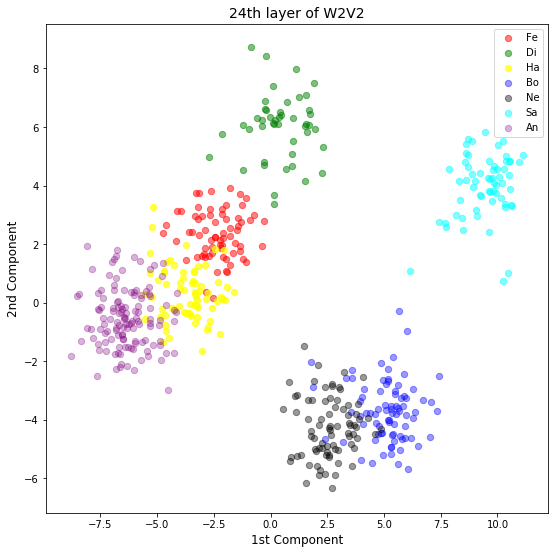

In [158]:
#plot 2d distribution

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

X = hct_feats
Y = labels

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# pca = PCA(n_components=2)
# pca.fit(X_scaled, Y)
# X_new = pca.transform(X_scaled)

lda = LDA(n_components=2)
lda.fit(X_scaled, Y)
X_new = lda.transform(X_scaled)

ex_variance=np.var(X_new,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

Xax = X_new[:,0]
Yax = X_new[:,1]

cdict = {0:'red',1:'green',2:'yellow',3:'blue',4:'black',5:'cyan',6:'purple'}
labl = {0:'Fe',1:'Di',2:'Ha',3:'Bo',4:'Ne',5:'Sa',6:'An'}
marker = {0:'o',1:'o',2:'o',3:'o',4:'o',5:'o',6:'o'}
alpha = {0:.5,1:.5,2:.7,3:.4,4:.4,5:.5,6:.3}

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

fig.patch.set_facecolor('white')
for l in np.unique(Y):
    ix=np.where(Y==l)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[l], s=40, label=labl[l], marker=marker[l], alpha=alpha[l])

ax.set_xlabel('1st Component', fontsize=12)
ax.set_ylabel('2nd Component', fontsize=12)
ax.set_title('24th layer of W2V2', fontsize=14)

ax.legend()
plt.show()

/usr/lib64/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


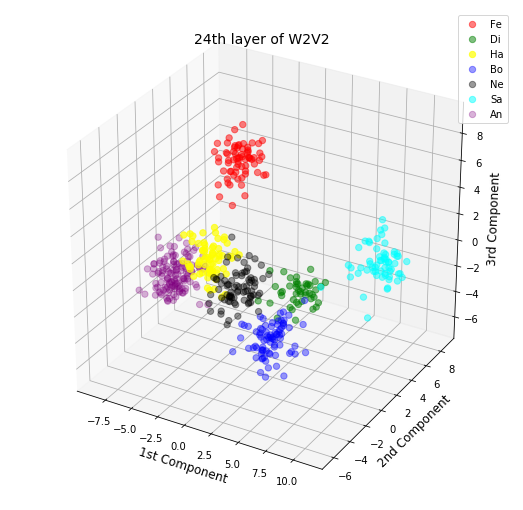

In [165]:
#plot 3d distribution

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

X = hct_feats
Y = labels

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# pca = PCA(n_components=3)
# pca.fit(X_scaled) 
# X_new = pca.transform(X_scaled)

lda = LDA(n_components=3)
lda.fit(X_scaled, Y)
X_new = lda.transform(X_scaled)

ex_variance=np.var(X_new,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

Xax = X_new[:,0]
Yax = X_new[:,1]
Zax = X_new[:,2]

cdict = {0:'red',1:'green',2:'yellow',3:'blue',4:'black',5:'cyan',6:'purple'}
labl = {0:'Fe',1:'Di',2:'Ha',3:'Bo',4:'Ne',5:'Sa',6:'An'}
marker = {0:'o',1:'o',2:'o',3:'o',4:'o',5:'o',6:'o'}
alpha = {0:.5,1:.5,2:.7,3:.4,4:.4,5:.5,6:.3}

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(Y):
    ix=np.where(Y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40, label=labl[l], marker=marker[l], alpha=alpha[l])

ax.set_xlabel("1st Component", fontsize=12)
ax.set_ylabel("2nd Component", fontsize=12)
ax.set_zlabel("3rd Component", fontsize=12)
ax.set_title('24th layer of W2V2', fontsize=14)

ax.legend()
plt.show()

In [160]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils import shuffle
from torch.utils.data import TensorDataset, DataLoader

A = X_scaled[0:69]
yA = [1]*69
E = X_scaled[69:115]
yE = [1]*46
F = X_scaled[115:186]
yF = [1]*71
L = X_scaled[186:267]
yL = [1]*81
N = X_scaled[267:346]
yN = [1]*79
T = X_scaled[346:408]
yT = [1]*62
W = X_scaled[408:535]
yW = [1]*127

A_train = A[:int(69*0.7)]
A_test = A[int(69*0.7):]
E_train = E[:int(46*0.7)]
E_test = E[int(46*0.7):]
F_train = F[:int(71*0.7)]
F_test = F[int(71*0.7):]
L_train = L[:int(81*0.7)]
L_test = L[int(81*0.7):]
N_train = N[:int(79*0.7)]
N_test = N[int(79*0.7):]
T_train = T[:int(62*0.7)]
T_test = T[int(62*0.7):]
W_train = W[:int(127*0.7)]
W_test = W[int(127*0.7):]

In [161]:
#Quantitative analysis

from sklearn.metrics import f1_score

#A vs other
x_train = np.vstack((A_train,E_train,F_train,L_train,N_train,T_train,W_train))
x_test = np.vstack((A_test,E_test,F_test,L_test,N_test,T_test,W_test))
y_train = yA[:int(69*0.7)] + [0]*(len(x_train)-len(yA[:int(69*0.7)]))
y_test = yA[int(69*0.7):] + [0]*(len(x_test)-len(yA[int(69*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Fear_F1:",f1_score(y_test, y_pred))

#E vs other
x_train = np.vstack((E_train,A_train,F_train,L_train,N_train,T_train,W_train))
x_test = np.vstack((E_test,A_test,F_test,L_test,N_test,T_test,W_test))
y_train = yE[:int(46*0.7)] + [0]*(len(x_train)-len(yE[:int(46*0.7)]))
y_test = yE[int(46*0.7):] + [0]*(len(x_test)-len(yE[int(46*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Disg_F1:",f1_score(y_test, y_pred))

#F vs other
x_train = np.vstack((F_train,A_train,E_train,L_train,N_train,T_train,W_train))
x_test = np.vstack((F_test,A_test,E_test,L_test,N_test,T_test,W_test))
y_train = yF[:int(71*0.7)] + [0]*(len(x_train)-len(yF[:int(71*0.7)]))
y_test = yF[int(71*0.7):] + [0]*(len(x_test)-len(yF[int(71*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Happ_F1:",f1_score(y_test, y_pred))

#L vs other
x_train = np.vstack((L_train,A_train,E_train,F_train,N_train,T_train,W_train))
x_test = np.vstack((L_test,A_test,E_test,F_test,N_test,T_test,W_test))
y_train = yL[:int(81*0.7)] + [0]*(len(x_train)-len(yL[:int(81*0.7)]))
y_test = yL[int(81*0.7):] + [0]*(len(x_test)-len(yL[int(81*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Bord_F1:",f1_score(y_test, y_pred))

#N vs other
x_train = np.vstack((N_train,A_train,E_train,F_train,L_train,T_train,W_train))
x_test = np.vstack((N_test,A_test,E_test,F_test,L_test,T_test,W_test))
y_train = yN[:int(79*0.7)] + [0]*(len(x_train)-len(yN[:int(79*0.7)]))
y_test = yN[int(79*0.7):] + [0]*(len(x_test)-len(yN[int(79*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Neut_F1:",f1_score(y_test, y_pred))

#T vs other
x_train = np.vstack((T_train,A_train,E_train,F_train,L_train,N_train,W_train))
x_test = np.vstack((T_test,A_test,E_test,F_test,L_test,N_test,W_test))
y_train = yT[:int(62*0.7)] + [0]*(len(x_train)-len(yT[:int(62*0.7)]))
y_test = yT[int(62*0.7):] + [0]*(len(x_test)-len(yT[int(62*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Sadn_F1:",f1_score(y_test, y_pred))

#W vs other
x_train = np.vstack((W_train,A_train,E_train,F_train,L_train,N_train,T_train))
x_test = np.vstack((W_test,A_test,E_test,F_test,L_test,N_test,T_test))
y_train = yW[:int(127*0.7)] + [0]*(len(x_train)-len(yW[:int(127*0.7)]))
y_test = yW[int(127*0.7):] + [0]*(len(x_test)-len(yW[int(127*0.7):]))

x_train, y_train = shuffle(x_train, y_train, random_state=1)

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Ange_F1:",f1_score(y_test, y_pred))


/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Fear_F1: 0.0
Disg_F1: 0.0


/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Happ_F1: 0.0
Bord_F1: 0.07692307692307693


/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Neut_F1: 0.0
Sadn_F1: 0.5185185185185185
Ange_F1: 0.09523809523809523


In [170]:
# ASR performance

path = '/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/Berlin/wav'
os.chdir(path)

torch.cuda.empty_cache()

for file in os.listdir('.'):
    audioinput, sr = librosa.load(file, sr=16000)
    audioinput = librosa.util.fix_length(audioinput, size=143652, mode="edge") #pad to same length    
    
    #w2v features
    input_values = processor(audioinput, sampling_rate=16000, return_tensors="pt").input_values.to(device)
    logits = w2v_model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    prediction = processor.decode(predicted_ids[0])
    print(file[0:2], file[2:5], file[5], file[6], prediction)
    torch.cuda.empty_cache()

03 a01 F a der lappen liegt auf dem eisschrank
03 a01 N c der lappen liegt auf dem eisschrank
03 a01 W a der lappen liegt auf dem eisschrank
03 a02 F c das will sie am mitwoch abgeben
03 a02 N c das will sie a mittwoch abgeben
03 a02 T a das will sie am mittwoch abgeben
03 a02 W b das will sie am mittwoch abgeben
03 a02 W c das will's ja mitwoch abgeben
03 a04 A d heute abend könnte ich's ihm sagen
03 a04 F d heute abend könnt ich's ihm sagen
03 a04 L c heute abend könnt ich's ihm sagen
03 a04 N c heute abend könnt ich's ihm sagen
03 a04 T a heute abend könnte ich's ihm sagen
03 a04 W c heute abend könnt ich's ihm sagen
03 a05 A a das schwarze plattpapier befindet sich da oben neben dem holzstück
03 a05 F c das schwarze platt papier befindet sich da oben neben dem holzstück
03 a05 N d das schwarze platt papier befindet sich da oben neben dem holzstück
03 a05 T c das schwarze plattpapier befindet sich da oben neben dem holzstück
03 a05 W a das schwarze platt papier befindet sich da oben

09 b02 W c sie haben es gerade hochgetragen und jetzt gehen sie wieder runter
09 b02 W d sie haben es gerade hoch getragen und jetzt gehen sie wieder runter
09 b03 E d an den wochenenden bin ich jetzt immer nach hause gefahren und da habe agnes besucht
09 b03 F a anden wochen enden bin ich jetzt immer nach hause gefahren unda habe agnes versucht
09 b03 F d an den wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
09 b03 L b an den wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
09 b03 N b an den wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
09 b03 T a an den wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
09 b03 W b an den wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
09 b09 E a ich will das eben wegbringen und dann wird calwas trinken gehen
09 b09 N d ich will das ihm wegbringen und dann mit kaivers trinken gehen
09 b09 W a ich will das eben wegbringe

12 b02 E a sie haben es gerade hoch getragen und jetzt gehen sie wieder runter
12 b02 F b sie habens gerade hochgetragen und jetzt gehen sie wieder runter
12 b02 N a sie haben es gerade hochgetragen und jetzt gehen sie wieder runter
12 b02 W a sie haben es gerade hochgetragen und jetzt gehen sie wieder unter
12 b02 W b sie haben es gerade hochgetragen und jetzt gehen sie wieder runter
12 b02 W d sie haben es gerade hochgetragen und jetzt gehn sie wieder runter
12 b03 L a wochunden bin ich jetzt immer nach hause gefahren und habe agnes besucht
12 b03 T a anden wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
12 b09 A c ich will das eben wegbringen und dann mit karl was trinken gehen
12 b09 T d ich will das eben wegbringen und dann mit kalwas trinken gehn
12 b09 W c ich will das ihm wegbringen und dann mit kawas trinken gehen
12 b10 A c die wird auf dem platz sen wo wir sie immer hinlegen
12 b10 L d wird auf dem platz sein wo wir sie immer hinlegen
12 b10 W a di

14 b03 T a anden wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
14 b03 W b an den wochenenden bin ich jetzt immer nach hause gefahren und habe agnes besucht
14 b09 A c ich will das eben wegbringe und dann mit kalvas trinken gehen
14 b09 E a ich will das eben wegbringen und dann mit kalvas trinken gehen
14 b09 F c ich will das eben wegbringen und dann mit kalvas trinken gehen
14 b09 L b ich will das eben wegbringen und dann mit kaiwas trinken gehen
14 b09 T d ich will das eben wegbringen und dann mit kalvers trinken gehen
14 b09 W a ich will das eben wegbringen und dann mit kalvas trinken gehen
14 b09 W c ich will das eben wegbringen und dann mit kalvars trinken gehen
14 b10 A d wird auf dem platt sein wo wir sie immer hinlegen
14 b10 E b die wird auf dem platz sein wo wir sie immer hinlegen
14 b10 L b wie wird auf dem platz sein wo wir sie imma hinlegen
14 b10 N b die wird auf dem platz sein wo wir sie immerhinlegen
14 b10 T c die wird auf dem platz sein wo 

16 b09 E b ich will das eben wegbringen und dann mit karl was trinken gehn
16 b09 F b ich will das eben wegbringen und dann mit karlwas trinken gehn
16 b09 L a ich will das eben wegbringen und dann mit kavas trinken gehen
16 b09 L b ich will das eben wegbringen und dan mit kalvas trinken gehen
16 b09 W b ich will das eben wegbringen und dann mit kalwas trinken gehn
16 b10 A a die wird auf dem platz sein wo wir sie immer hinlegen
16 b10 E b die wird auf dem platz sein wo wir sie immer hinlegen
16 b10 F b die wird auf dem platz sein wo wir sie immer hinlegen
16 b10 L b die wird auf dem platz sein wo wir sie immer hinlegen
16 b10 T b wird auf dem platz sein wo wir sie immer hinlegen
16 b10 T d wiauf dem platz sein wo wir sie immer hinlegen
16 b10 W a die wird auf dem platz sein wo wir sie immer hinlegen
16 b10 W b die wird auf dem platz sein wo wir sie immer hinlegen


In [30]:
import h5py
hf = h5py.File('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/Corpora/Berlin//feats/mfcc.h5', 'w')
hf.create_dataset('fear', data=hct_A)
hf.create_dataset('disg', data=hct_E)
hf.create_dataset('happ', data=hct_F)
hf.create_dataset('bord', data=hct_L)
hf.create_dataset('neut', data=hct_N)
hf.create_dataset('sadn', data=hct_T)
hf.create_dataset('ange', data=hct_W)
hf.close()